## 4 

Initial Data Shape (136, 1080, 1920)
Time for random SVD: 2.487824s
Time for random SVD with subsampling: 2.696869s
Time for true SVD: 17.385850s


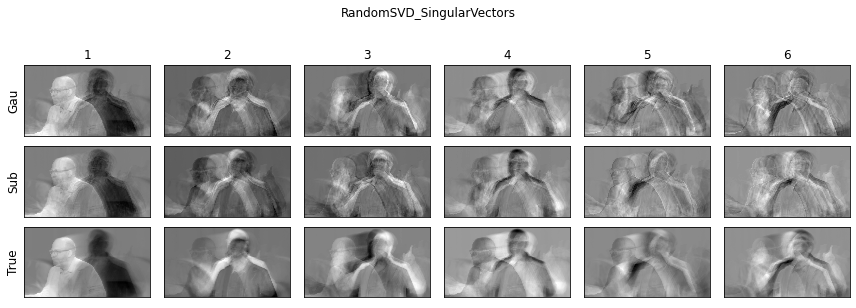

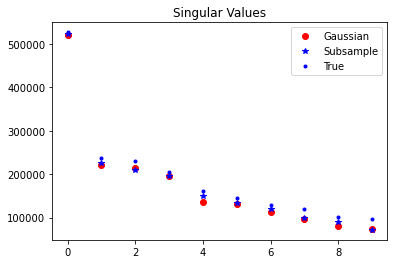

In [5]:
from __future__ import print_function
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from movie_tools import * 
import time
"""
Used while plotting to choose the best sign of the singular vector for displaying.
"""
def imcmp(im1, im2) :
    n1 = np.linalg.norm(im1-im2)
    n2 = np.linalg.norm(im1+im2)
    return 1 if n1 < n2 else -1

"""
Implements the randomized SVD algorithm.  
Arguments:
data - 2d numpy array with shape (r,c) of movie frames (one frame per column)
k - number of singular vectors and singular values to return
p - number of extra random vectors to generate
use_sub - False for Gaussian random subspace, True for random subsampling

Returns:
U,s,VT
U - 2d numpy array with shape (r,k) of the first k left singular vectors
s - 1d numpy array with first k singular values
VT - 2d numpy array with shape (k,c) of the first k right singular vectors (as rows).  
"""
def random_svd(data,k,p,use_sub=False) :
    use = data.shape[1] 
    if use_sub == True: 
        random_matrix = np.random.normal(0, 1, size=(use, k + p)) 
    else: 
        random_matrix = np.random.randn(use, k + p) 
    A = data @ random_matrix  
    Q, R = np.linalg.qr(A) 
    u, sigma, v = np.linalg.svd(Q.T @ data) 
    u_ans = Q @ u 
    return u_ans, sigma, v 

def main() :
    filename = "JohnOliverClip1Gray.mkv" #Location of movie file
    data = load_movie(filename)
    k = 10
    p = 7
    print("Initial Data Shape",data.shape)
    shape = data.shape[1:]
    flatData = data.reshape((data.shape[0],np.prod(shape)))
    meanData = np.mean(flatData,axis=0)
    centeredData = flatData-meanData
    imgs = []
    
    t = time.time()
    U,s,VT = random_svd(centeredData.T,k,p,False)
    print("Time for random SVD: %fs"%(time.time()-t)) 
    imgs.extend([U[:,i].T for i in range(6)])
    
    t = time.time()
    U,ss,VT = random_svd(centeredData.T,k,p,True)
    imgs.extend([imcmp(imgs[i],U[:,i].T)*U[:,i].T for i in range(6)])
    print("Time for random SVD with subsampling: %fs"%(time.time()-t))
    
    
    
    t = time.time()
    U,ssT,VT = np.linalg.svd(centeredData.T,full_matrices=0)
    imgs.extend([imcmp(imgs[i],U[:,i].T)*U[:,i].T for i in range(6)])
    print("Time for true SVD: %fs"%(time.time()-t))

    plot_image_grid(imgs,"RandomSVD_SingularVectors",shape,6,3,0,     
                    row_titles=['Gau','Sub','True'],
                    col_titles=map(str,range(1,7)))

    plt.plot(s[0:k],'ro',label='Gaussian') 
    plt.plot(ss[0:k],'b*',label='Subsample') 
    plt.plot(ssT[0:k],'b.',label='True')
    plt.legend(numpoints=1)
    plt.title('Singular Values')
    plt.savefig('RandomSVD_SingularValues.pdf',bbox_inches='tight')
    plt.show()

if __name__ == "__main__" :
    main()

